[link text](https://)# CNN for **Brain** Tumor Detection Using Pytorch

In [1]:
!pip install -q --upgrade sympy

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import kagglehub
import os

print("📥 Downloading Dataset via KaggleHub...")
path = kagglehub.dataset_download("navoneel/brain-mri-images-for-brain-tumor-detection")
print(f"✅ Dataset downloaded to: {path}")

scan_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

data_dir = os.path.join(path, 'brain_tumor_dataset')
full_dataset = datasets.ImageFolder(root=data_dir, transform=scan_transforms)

# Split Data (80% Train / 20% Test)
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_set, test_set = random_split(full_dataset, [train_size, test_size])

train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

print(f"📊 Training Samples: {len(train_set)} | Testing Samples: {len(test_set)}")

📥 Downloading Dataset via KaggleHub...
Using Colab cache for faster access to the 'brain-mri-images-for-brain-tumor-detection' dataset.
✅ Dataset downloaded to: /kaggle/input/brain-mri-images-for-brain-tumor-detection
📊 Training Samples: 202 | Testing Samples: 51


In [3]:
class BrainTumorClassifier(nn.Module):
    def __init__(self):
        super(BrainTumorClassifier, self).__init__()

        # Layer 1: Input (3 channels) -> 32 filters
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)

        # Layer 2: 32 -> 64 filters
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        # Layer 3: 64 -> 128 filters
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)

        # Classification Layer
        self.fc1 = nn.Linear(128 * 16 * 16, 128) # Flattened size: 128 filters * 16x16 image
        self.fc2 = nn.Linear(128, 2) # Output: Tumor (1) or Healthy (0)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5) # Prevents overfitting

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x))) # Block 1
        x = self.pool(self.relu(self.conv2(x))) # Block 2
        x = self.pool(self.relu(self.conv3(x))) # Block 3
        x = x.view(-1, 128 * 16 * 16)           # Flatten
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BrainTumorClassifier().to(device)
print(f"🚀 Model initialized on {device}")

🚀 Model initialized on cpu


In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 12 # Good balance for speed/accuracy

print("⏳ Starting Training...")
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {running_loss/len(train_loader):.4f}")

print("✅ Training Complete!")
# Save the model
torch.save(model.state_dict(), 'brain_tumor_model.pth')
print("💾 Model saved as 'brain_tumor_model.pth'")

⏳ Starting Training...
Epoch [1/12] - Loss: 0.6913
Epoch [2/12] - Loss: 0.5791
Epoch [3/12] - Loss: 0.5349
Epoch [4/12] - Loss: 0.4713
Epoch [5/12] - Loss: 0.3889
Epoch [6/12] - Loss: 0.5053
Epoch [7/12] - Loss: 0.3658
Epoch [8/12] - Loss: 0.3049
Epoch [9/12] - Loss: 0.3142
Epoch [10/12] - Loss: 0.3374
Epoch [11/12] - Loss: 0.2720
Epoch [12/12] - Loss: 0.2154
✅ Training Complete!
💾 Model saved as 'brain_tumor_model.pth'


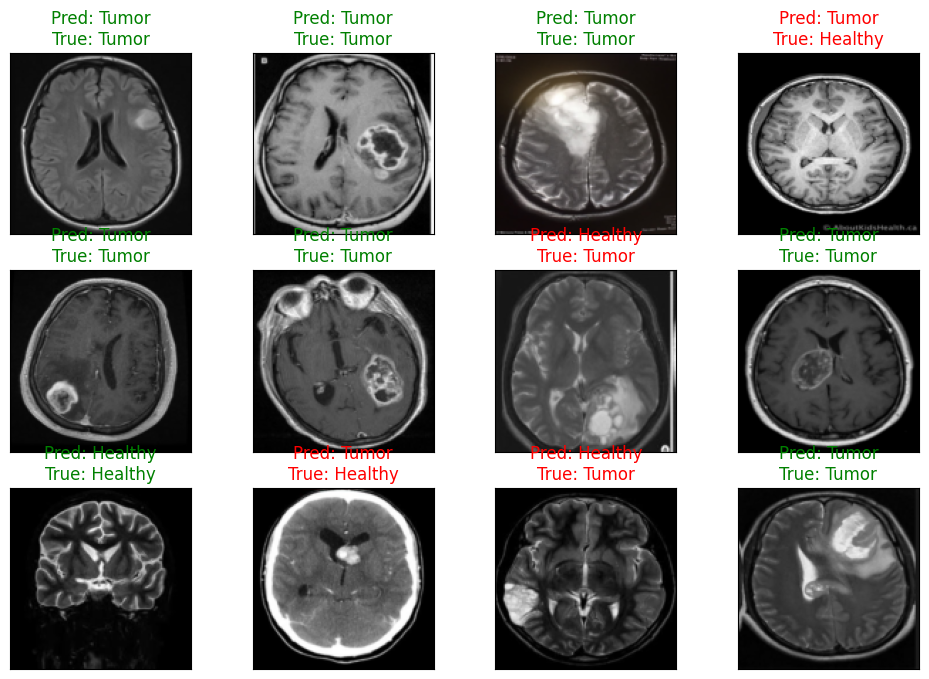

In [5]:
# Visualize Results
model.eval()
dataiter = iter(test_loader)
images, labels = next(dataiter)
images = images.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Plotting
fig = plt.figure(figsize=(12, 8))
classes = ['Healthy', 'Tumor']

for idx in range(12):
    ax = fig.add_subplot(3, 4, idx+1, xticks=[], yticks=[])
    img = images[idx].cpu() / 2 + 0.5 # Un-normalize
    plt.imshow(img.permute(1, 2, 0))

    pred_label = classes[predicted[idx]]
    true_label = classes[labels[idx]]
    color = 'green' if pred_label == true_label else 'red'

    ax.set_title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)

plt.show()

Cloning into 'Tumor-detection-project'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 18 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 341.35 KiB | 2.63 MiB/s, done.
Resolving deltas: 100% (4/4), done.
/content/Tumor-detection-project/Tumor-detection-project/Tumor-detection-project
cp: cannot stat '/content/Brain_Tumor_Detection_Using_Pytorch.ipynb': No such file or directory
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
remote: Permission to Ruush07/Tumor-detection-project.git denied to Ruush07.
fatal: unable to access 'https://github.com/Ruush07/Tumor-detection-project.git/': The requested URL returned error: 403
